In [20]:
## Importing important Library for the activity
import numpy as np                       ## for numpy array
import pandas as pd                      ## for panda series and DataFrame
import seaborn as sns                    ## for Visualization
import matplotlib.pyplot as plt          ## for Visualization
from statsmodels.api import stats as st
from statsmodels.formula.api import ols  ## Orderly Least Squares For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA


In [2]:
df = pd.read_csv('paul-newfood.csv')

In [3]:
df.head()

,Sales,PriceLevel,AdLevel,StoreSize
0,620,1,1,34
1,774,1,1,41
2,955,1,2,32
3,669,1,2,28
4,623,1,1,34


In [4]:
df.describe()

,Sales,PriceLevel,AdLevel,StoreSize
count,24.000000,24.000000,24.000000,24.000000
mean,571.416667,2.000000,1.500000,32.333333
std,212.629279,0.834058,0.510754,6.424590
min,294.000000,1.000000,1.000000,19.000000
25%,393.250000,1.000000,1.000000,28.750000
50%,550.000000,2.000000,1.500000,32.000000
75%,677.000000,3.000000,2.000000,37.000000
max,1208.000000,3.000000,2.000000,43.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sales       24 non-null     int64
 1   PriceLevel  24 non-null     int64
 2   AdLevel     24 non-null     int64
 3   StoreSize   24 non-null     int64
dtypes: int64(4)
memory usage: 896.0 bytes


In [8]:
df.PriceLevel = pd.Categorical(df.PriceLevel)

In [9]:
df.PriceLevel.value_counts()

1    8
2    8
3    8
Name: PriceLevel, dtype: int64

In [11]:
df.AdLevel = pd.Categorical(df.AdLevel)

In [12]:
df['AdLevel'].value_counts()

1    12
2    12
Name: AdLevel, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Sales       24 non-null     int64   
 1   PriceLevel  24 non-null     category
 2   AdLevel     24 non-null     category
 3   StoreSize   24 non-null     int64   
dtypes: category(2), int64(2)
memory usage: 816.0 bytes


In [17]:
formula = 'Sales ~ C(PriceLevel) + C(AdLevel)'
model = ols(formula, df).fit().summary()
print(model)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     9.110
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           0.000527
Time:                        23:32:12   Log-Likelihood:                -151.84
No. Observations:                  24   AIC:                             311.7
Df Residuals:                      20   BIC:                             316.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            776.4583     60

In [22]:
formula = 'Sales ~ C(PriceLevel) + C(AdLevel)'
model = ols(formula, df).fit()
anova_table = st.anova_lm(model)
print(anova_table)

                 df         sum_sq        mean_sq          F    PR(>F)
C(PriceLevel)   2.0  600412.583333  300206.291667  13.663982  0.000182
C(AdLevel)      1.0      32.666667      32.666667   0.001487  0.969624
Residual       20.0  439412.583333   21970.629167        NaN       NaN


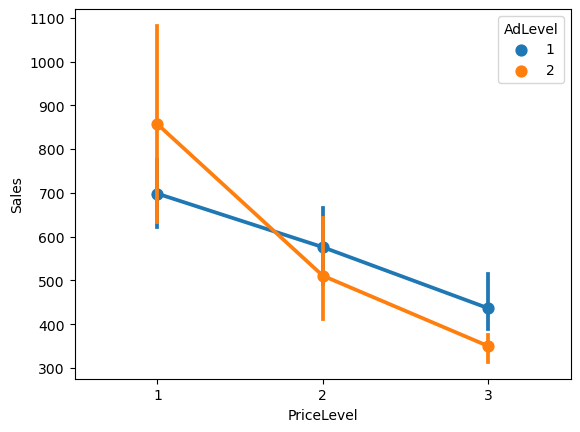

In [23]:
sns.pointplot(data=df, x='PriceLevel', y='Sales', hue='AdLevel');

C:\Users\Sudhanshu\AppData\Local\Temp\ipykernel_1620\1456590783.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='PriceLevel', y='Sales', data=df, hue='AdLevel', ci=None);


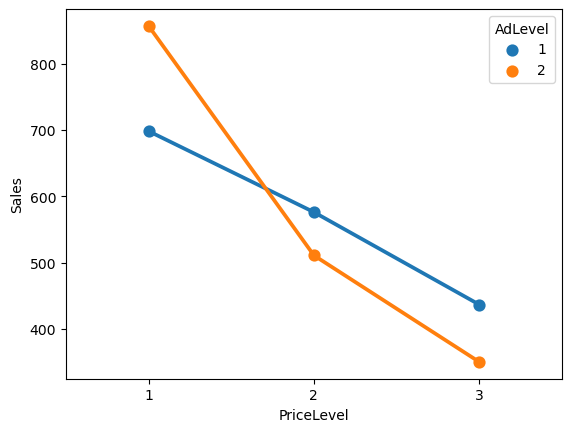

In [24]:
sns.pointplot(x='PriceLevel', y='Sales', data=df, hue='AdLevel', ci=None);

In [29]:
formula = 'Sales ~ C(PriceLevel) + C(AdLevel) + C(PriceLevel):C(AdLevel)'
model = ols(formula, df).fit()
aov_table = st.anova_lm(model)
pd.set_option('expand_frame_repr', False)
print(aov_table)

                            df         sum_sq        mean_sq          F    PR(>F)
C(PriceLevel)              2.0  600412.583333  300206.291667  14.781913  0.000159
C(AdLevel)                 1.0      32.666667      32.666667   0.001608  0.968450
C(PriceLevel):C(AdLevel)   2.0   73850.083333   36925.041667   1.818159  0.190898
Residual                  18.0  365562.500000   20309.027778        NaN       NaN


In [30]:
formula = 'Sales ~ C(PriceLevel) + C(AdLevel) + StoreSize + C(PriceLevel):C(AdLevel)'
model = ols(formula, df).fit()
aov_table = st.anova_lm(model,type=2)
pd.set_option('expand_frame_repr', False)
print(aov_table)

                            df         sum_sq        mean_sq          F    PR(>F)
C(PriceLevel)              2.0  600412.583333  300206.291667  29.483426  0.000003
C(AdLevel)                 1.0      32.666667      32.666667   0.003208  0.955492
C(PriceLevel):C(AdLevel)   2.0   73850.083333   36925.041667   3.626429  0.048790
StoreSize                  1.0  192465.010526  192465.010526  18.902095  0.000438
Residual                  17.0  173097.489474   10182.205263        NaN       NaN
